In [25]:
import sys
sys.path.append('../..') 
from typing import Any
import numpy as np
from DL import plot_graph
from Deep import MyModel
from Deep.activation import ReLU
from Deep.activation.loss import MeanSquaredError, CrossEntropyLoss
from Deep.optimizer.gdo import GradientDescentOptimizer

import matplotlib.pyplot as plt

In [26]:
# 一元三次函数拟合
loss_fn = MeanSquaredError()
layer_dict = {
    'output': {
        'type': 'linear',
        'in_features': 3,
        'out_features': 1,
        'loss_fn': loss_fn
    }
}

op = GradientDescentOptimizer(lr=0.1, max_iterations=500)
model = MyModel(layers_dict=layer_dict, optimizer = op)

In [27]:
x = np.random.uniform(low=-1000, high=1000, size=(1000, 3))
x = (x - x.mean())/x.max()
y = 12.6*x[:, 0]-3.3*x[:, 1]+9.3*x[:, 2]+0.6
y = np.array([y]).T
y.shape, x.shape

((1000, 1), (1000, 3))

In [28]:
model.fit(x, y)
model.loss[-1]

9.913409199848275e-06

In [29]:
model.layers[-1].weight, model.layers[-1].bias

(array([[12.59435082, -3.30066493,  9.29487598]]), array([[0.59983734]]))

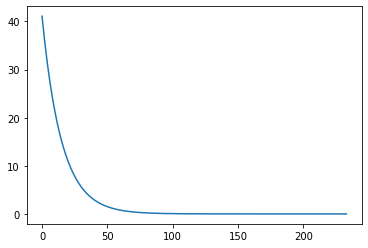

In [30]:
model.loss = np.array([model.loss])
plot_graph(model.loss, graph_show=True)

In [31]:
test_x = np.random.uniform(low=-1000, high=1000, size=(1000, 3))
y = 12.6*test_x[:, 0]-3.3*test_x[:, 1]+9.3*test_x[:, 2]+0.6
y = np.array([y])
y_pre = model.predict(test_x)
y.shape, y_pre.shape

((1, 1000), (1, 1000))

In [32]:
loss, a = loss_fn(y, y_pre)
loss

9.563035243880243